In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./global_sales_data/market_fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [24]:
sns.set_style('whitegrid')

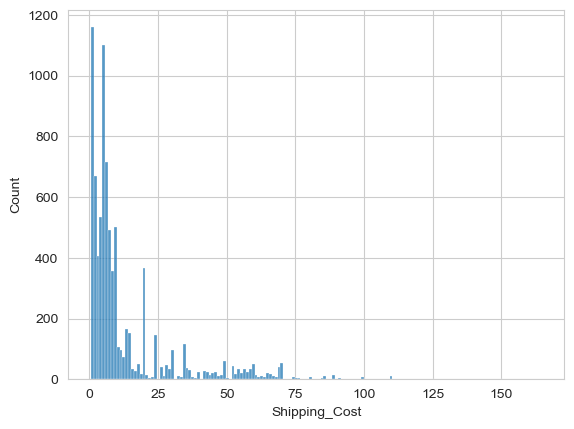

In [4]:
sns.histplot(df.Shipping_Cost)
plt.show()

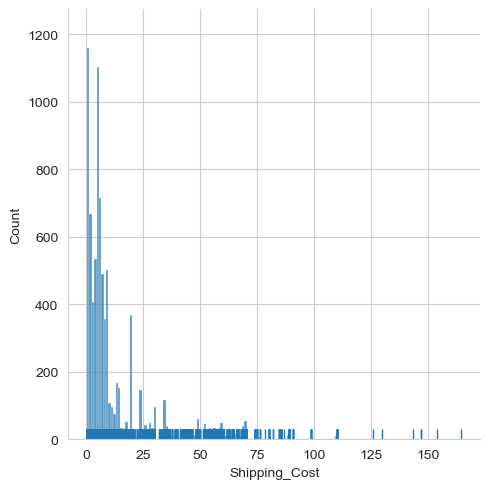

In [5]:
sns.displot(df.Shipping_Cost,rug=True)
plt.show()

In [10]:
df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

<Axes: xlabel='Sales', ylabel='Count'>

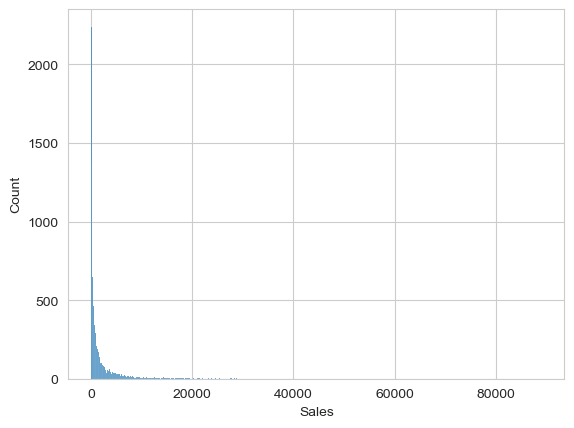

In [14]:
sns.histplot(df.Sales)

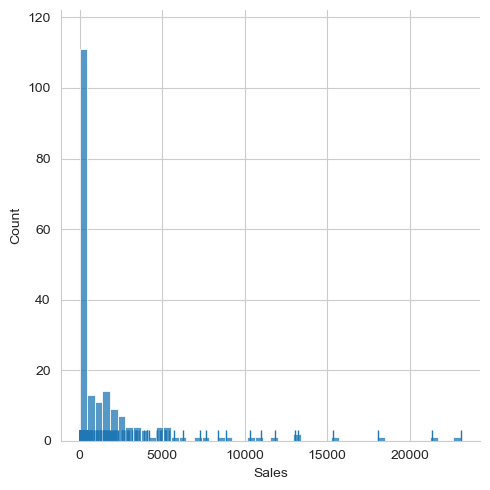

In [23]:
sns.displot(df.Sales[:200],bins=50,rug=True)

## Bivariate Distributions

The bivariate distributions are plots of two variables against one another.

Example: Profit VS Sales, Profit VS Month

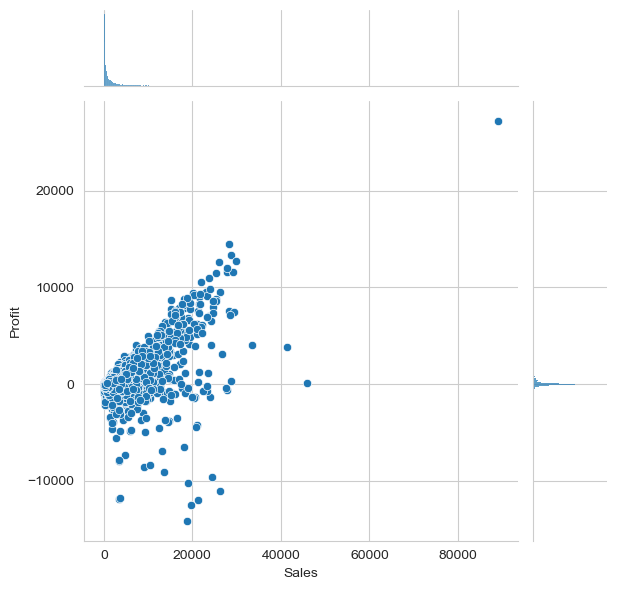

In [26]:
sns.jointplot(x='Sales',y='Profit',data=df)

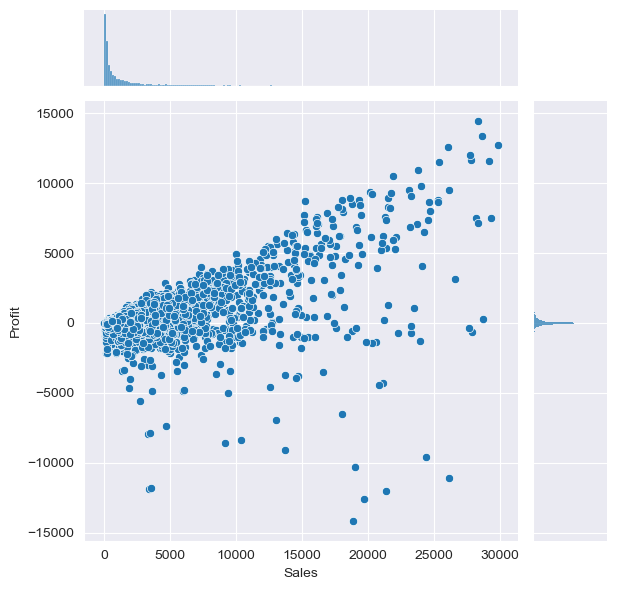

In [30]:
conc_df = df[(df['Sales']<30000)&(df['Profit']<20000)]
sns.jointplot(x='Sales',y='Profit',data=conc_df)

The above plot shows you the portion of the earlier plot we wanted, i.e., the portion where the sales and profit are highly interrelated.

Marking Datapoints where only profit has occurred

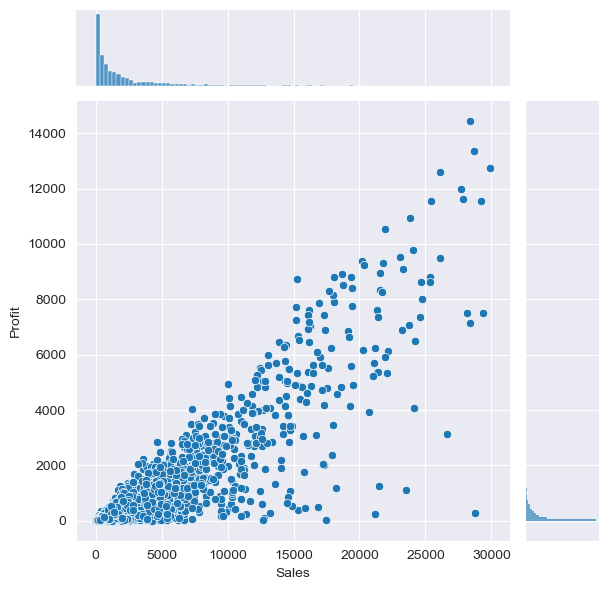

In [33]:
profit_df = conc_df[(conc_df['Profit']>0)]
sns.jointplot(x='Sales',y='Profit',data=profit_df)

In [37]:
# reading cryptocurrency files
btc = pd.read_csv("crypto_data/bitcoin_price.csv")
ether = pd.read_csv("crypto_data/ethereum_price.csv")
ltc = pd.read_csv("crypto_data/litecoin_price.csv")
monero = pd.read_csv("crypto_data/monero_price.csv")
neo = pd.read_csv("crypto_data/neo_price.csv")
quantum = pd.read_csv("crypto_data/qtum_price.csv")
ripple = pd.read_csv("crypto_data/ripple_price.csv")

# putting a suffix with column names so that joins are easy
btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
ether.columns = ether.columns.map(lambda x: str(x) + '_et')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x: str(x) + '_mon')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns = ripple.columns.map(lambda x: str(x) + '_rip')

btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [38]:
# merging all the files by date
m1 = pd.merge(btc, ether, how="inner", left_on="Date_btc", right_on="Date_et")
m2 = pd.merge(m1, ltc, how="inner", left_on="Date_btc", right_on="Date_ltc")
m3 = pd.merge(m2, monero, how="inner", left_on="Date_btc", right_on="Date_mon")
m4 = pd.merge(m3, neo, how="inner", left_on="Date_btc", right_on="Date_neo")
m5 = pd.merge(m4, quantum, how="inner", left_on="Date_btc", right_on="Date_qt")
crypto = pd.merge(m5, ripple, how="inner", left_on="Date_btc", right_on="Date_rip")

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,...,Close_qt,Volume_qt,Market Cap_qt,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


In [40]:
# Subsetting only the closing prices column for plotting
curr = crypto[["Close_btc", "Close_et", 'Close_ltc', "Close_mon", "Close_neo", "Close_qt"]]
curr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


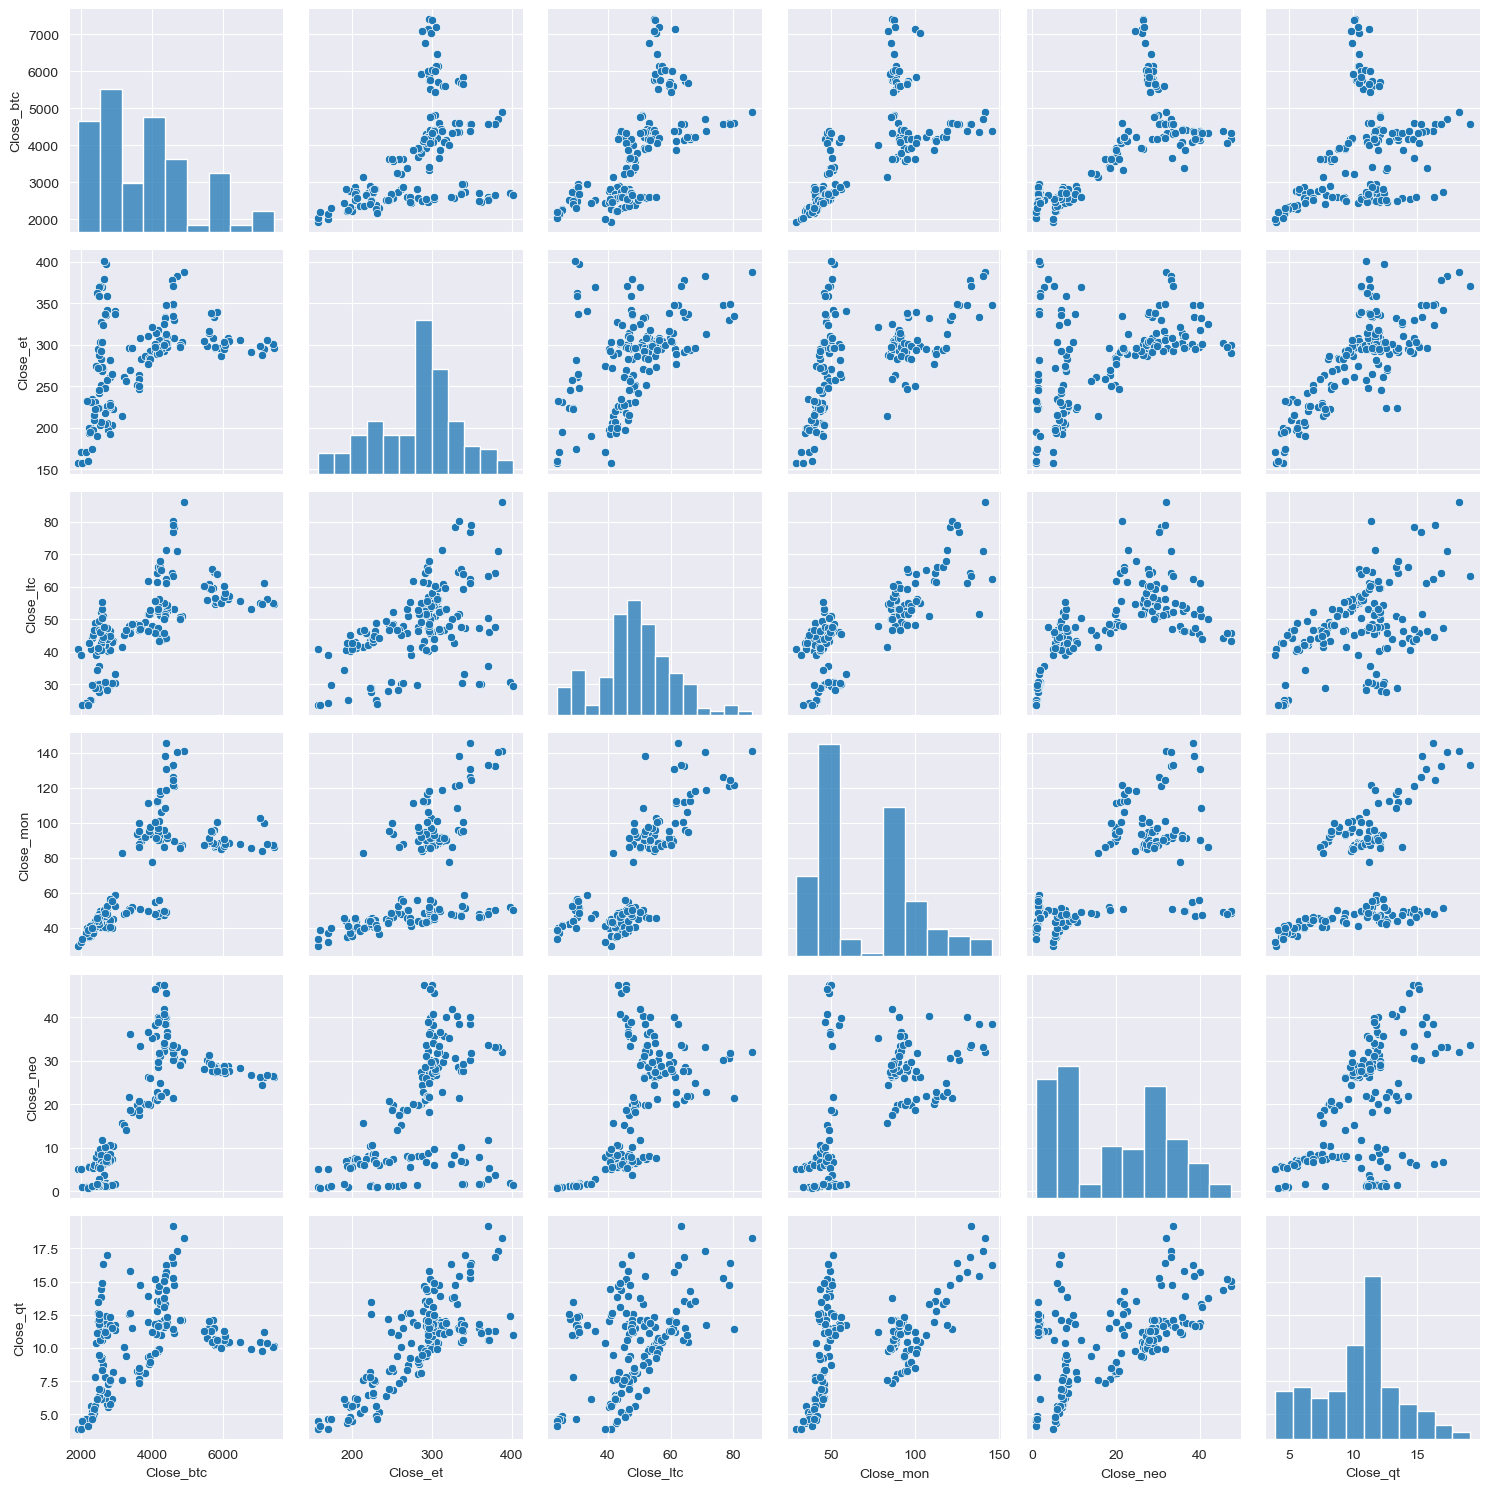

In [41]:
sns.pairplot(curr)
plt.tight_layout()
plt.show()

In [42]:
corr = curr.corr()
#The corr method provides the correlation between the data
corr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
Close_btc,1.000000,0.449322,0.657963,0.697058,0.734797,0.381921
Close_et,0.449322,1.000000,0.490281,0.539489,0.481910,0.791373
Close_ltc,0.657963,0.490281,1.000000,0.793368,0.641385,0.447711
Close_mon,0.697058,0.539489,0.793368,1.000000,0.668514,0.518419
Close_neo,0.734797,0.481910,0.641385,0.668514,1.000000,0.556858


From the above data we can see that the correlation between cryptos is quite high for some pairs. We know that the correlation ranges between -1 to 1.

Lets now plot a heatmap for this data

<Axes: >

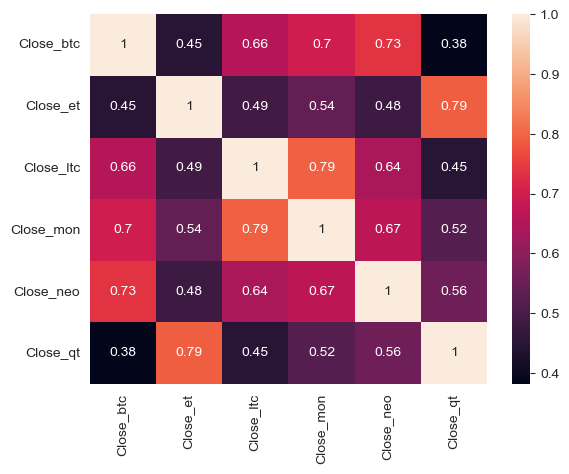

In [43]:
sns.heatmap(corr,annot=True)